In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Pullover


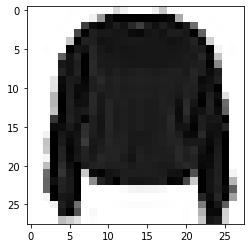

In [3]:
n=7
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_train = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 建立CNN

In [9]:
model = Sequential()

In [10]:
### 第一層建立CONV2D為32
### 第二層建立64
### 第三層是128

In [11]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1), activation = 'relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(30, activation='relu'))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0897 - accuracy: 0.1275
Epoch 2/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0889 - accuracy: 0.2723
Epoch 3/15
60000/60000 [==============================] - 60s 999us/sample - loss: 0.0870 - accuracy: 0.3619
Epoch 4/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0740 - accuracy: 0.5279
Epoch 5/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0484 - accuracy: 0.6706
Epoch 6/15
60000/60000 [==============================] - 60s 998us/sample - loss: 0.0417 - accuracy: 0.7179
Epoch 7/15
60000/60000 [==============================] - 58s 973us/sample - loss: 0.0389 - accuracy: 0.7372
Epoch 8/15
60000/60000 [==============================] - 59s 979us/sample - loss: 0.0372 - accuracy: 0.7485
Epoch 9/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0357 - accuracy: 0.7604
Epoch 

### 改變訓練參數 BATCH_SIZE改為120 EPOCHS改為15

In [25]:
model.fit(x_train, y_train, batch_size=120, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 59s 989us/sample - loss: 0.0277 - accuracy: 0.8055
Epoch 2/15
60000/60000 [==============================] - 59s 988us/sample - loss: 0.0269 - accuracy: 0.8135
Epoch 3/15
60000/60000 [==============================] - 59s 988us/sample - loss: 0.0262 - accuracy: 0.8177
Epoch 4/15
60000/60000 [==============================] - 59s 989us/sample - loss: 0.0256 - accuracy: 0.8225
Epoch 5/15
60000/60000 [==============================] - 59s 991us/sample - loss: 0.0250 - accuracy: 0.8270
Epoch 6/15
60000/60000 [==============================] - 60s 992us/sample - loss: 0.0246 - accuracy: 0.8294
Epoch 7/15
60000/60000 [==============================] - 58s 973us/sample - loss: 0.0240 - accuracy: 0.8351
Epoch 8/15
60000/60000 [==============================] - 57s 953us/sample - loss: 0.0236 - accuracy: 0.8367
Epoch 9/15
60000/60000 [==============================] - 60s 994us/sample - loss: 0.0231 - accuracy: 0.8

In [26]:
y_predict = model.predict_classes(x_test)
def showpredict(n):
    print('model預測：',class_names[y_predict[n]])
    print('答案是：',class_names[y_test[n]])
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

In [27]:
from ipywidgets import interact_manual

In [28]:
interact_manual(showpredict, n=(0,len(x_test)-1))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.showpredict(n)>

In [29]:
score = model.evaluate(x_test, y_test_, verbose=0)
print("正確率為：", score[1])


正確率為： 0.8506
